Defaulting to user installation because normal site-packages is not writeable


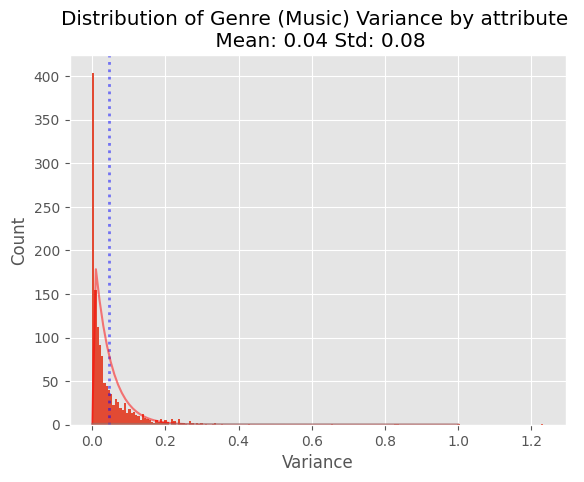

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df_music = pd.read_csv("Results/music_variance.csv")
# plot the histrogram of the data
plt.style.use('ggplot')
plt.hist(df_music['0'], bins=200)


# calculate the mean and standard deviation of the data
mean = np.mean(df_music['0'])
std = np.std(df_music['0'])
# plot the mean and standard deviation on the histogram
plt.axvline(mean, color='b', linestyle='dotted', linewidth=2, alpha=0.5)

!pip3 install scipy
# fit an exponential distribution to the data:
from scipy.stats import expon

# fit an exponential distribution to the data:
param = expon.fit(df_music['0'])

# now, param[0] and param[1] are the mean and 
# the standard deviation of the fitted distribution
x = np.linspace(0,1,100)
# fitted distribution
pdf_fitted = expon.pdf(x,loc=param[0],scale=param[1]) * 10
# original distribution
pdf = expon.pdf(x) 


plt.plot(x,pdf_fitted,'r-',x,pdf,'grey', alpha=0.5)
plt.title(f"Distribution of Genre (Music) Variance by attribute \n Mean: {mean:.2f} Std: {std:.2f}")
plt.xlabel('Variance')
plt.ylabel('Count')
plt.show()


Defaulting to user installation because normal site-packages is not writeable


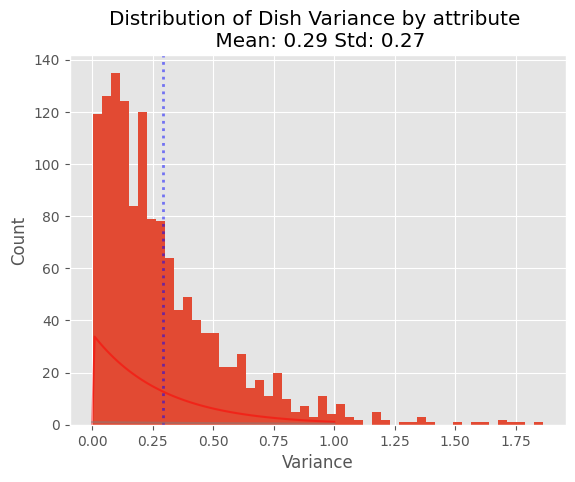

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df_dish = pd.read_csv("Results/dish_variance.csv")
# plot the histrogram of the data
plt.style.use('ggplot')
plt.hist(df_dish['0'], bins=50)


# calculate the mean and standard deviation of the data
mean = np.mean(df_dish['0'])
std = np.std(df_dish['0'])
# plot the mean and standard deviation on the histogram
plt.axvline(mean, color='b', linestyle='dotted', linewidth=2, alpha=0.5)

!pip3 install scipy
# fit an exponential distribution to the data:
from scipy.stats import expon

# fit an exponential distribution to the data:
param = expon.fit(df_dish['0'])

# now, param[0] and param[1] are the mean and 
# the standard deviation of the fitted distribution
x = np.linspace(0,1,100)
# fitted distribution
pdf_fitted = expon.pdf(x,loc=param[0],scale=param[1]) * 10
# original distribution
pdf = expon.pdf(x) 


plt.plot(x,pdf_fitted,'r-',x,pdf,'grey', alpha=0.5)
plt.title(f"Distribution of Food bias Variance by attribute \n Mean: {mean:.2f} Std: {std:.2f}")
plt.xlabel('Variance')
plt.ylabel('Count')
plt.show()


In [37]:
def result_plot(ax, file):
    df = pd.read_csv(f"Results/{file}.csv")
    # plot the histrogram of the data
    plt.style.use('ggplot')
    ax.hist(df['0'], bins=50)


    # calculate the mean and standard deviation of the data
    mean = np.mean(df['0'])
    std = np.std(df['0'])
    # plot the mean and standard deviation on the histogram
    ax.axvline(mean, color='b', linestyle='dotted', linewidth=2, alpha=0.5)

    # fit an exponential distribution to the data:
    from scipy.stats import expon

    # fit an exponential distribution to the data:
    param = expon.fit(df['0'])

    # now, param[0] and param[1] are the mean and 
    # the standard deviation of the fitted distribution
    x = np.linspace(0,np.max(df['0']),100)
    # fitted distribution
    pdf_fitted = expon.pdf(x,loc=param[0],scale=param[1]) * 10
    # original distribution
    pdf = expon.pdf(x) 

    ax.plot(x,pdf_fitted,'r-',x,pdf,'grey', alpha=0.5)
    ax.set_title(f"Distribution of {file} bias Variance by attribute \n Mean: {mean:.2f} Std: {std:.2f}")
    ax.set_xlabel('Variance')
    ax.set_ylabel('Count')
    return ax, df

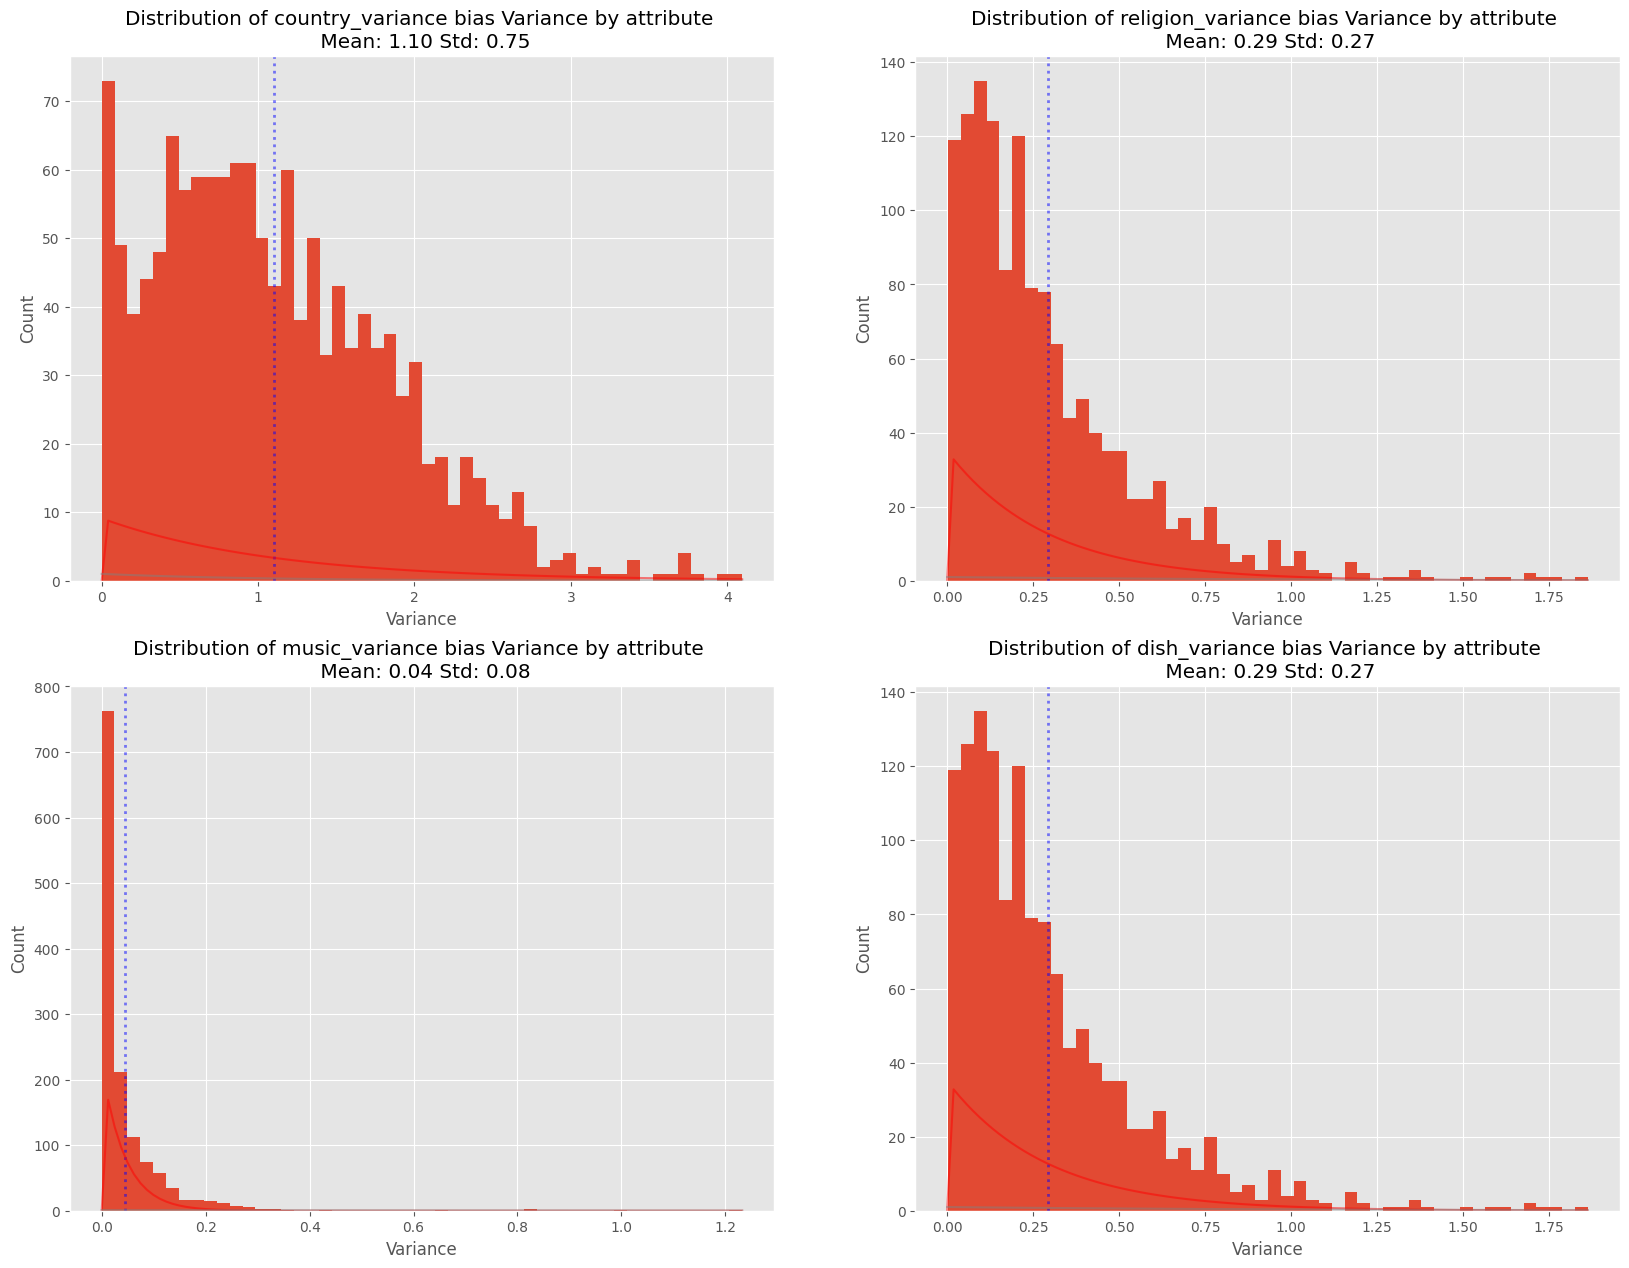

In [38]:
fig, ax = plt.subplots(2, 2, figsize=(20,15))
# store the dfs in a list
dfs = {}
for i, file in enumerate(["country_variance", "religion_variance", "music_variance", "dish_variance"]):
    ax[i//2, i%2], df = result_plot(ax[i//2, i%2], file)
    dfs[file] = df
plt.show()

In [39]:
# name the columns of the dataframe
dfs["country_variance"].columns = ["attribute", "variance"]
dfs["religion_variance"].columns = ["attribute", "variance"]
dfs["music_variance"].columns = ["attribute", "variance"]
dfs["dish_variance"].columns = ["attribute", "variance"]

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/gaurishkatlana/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


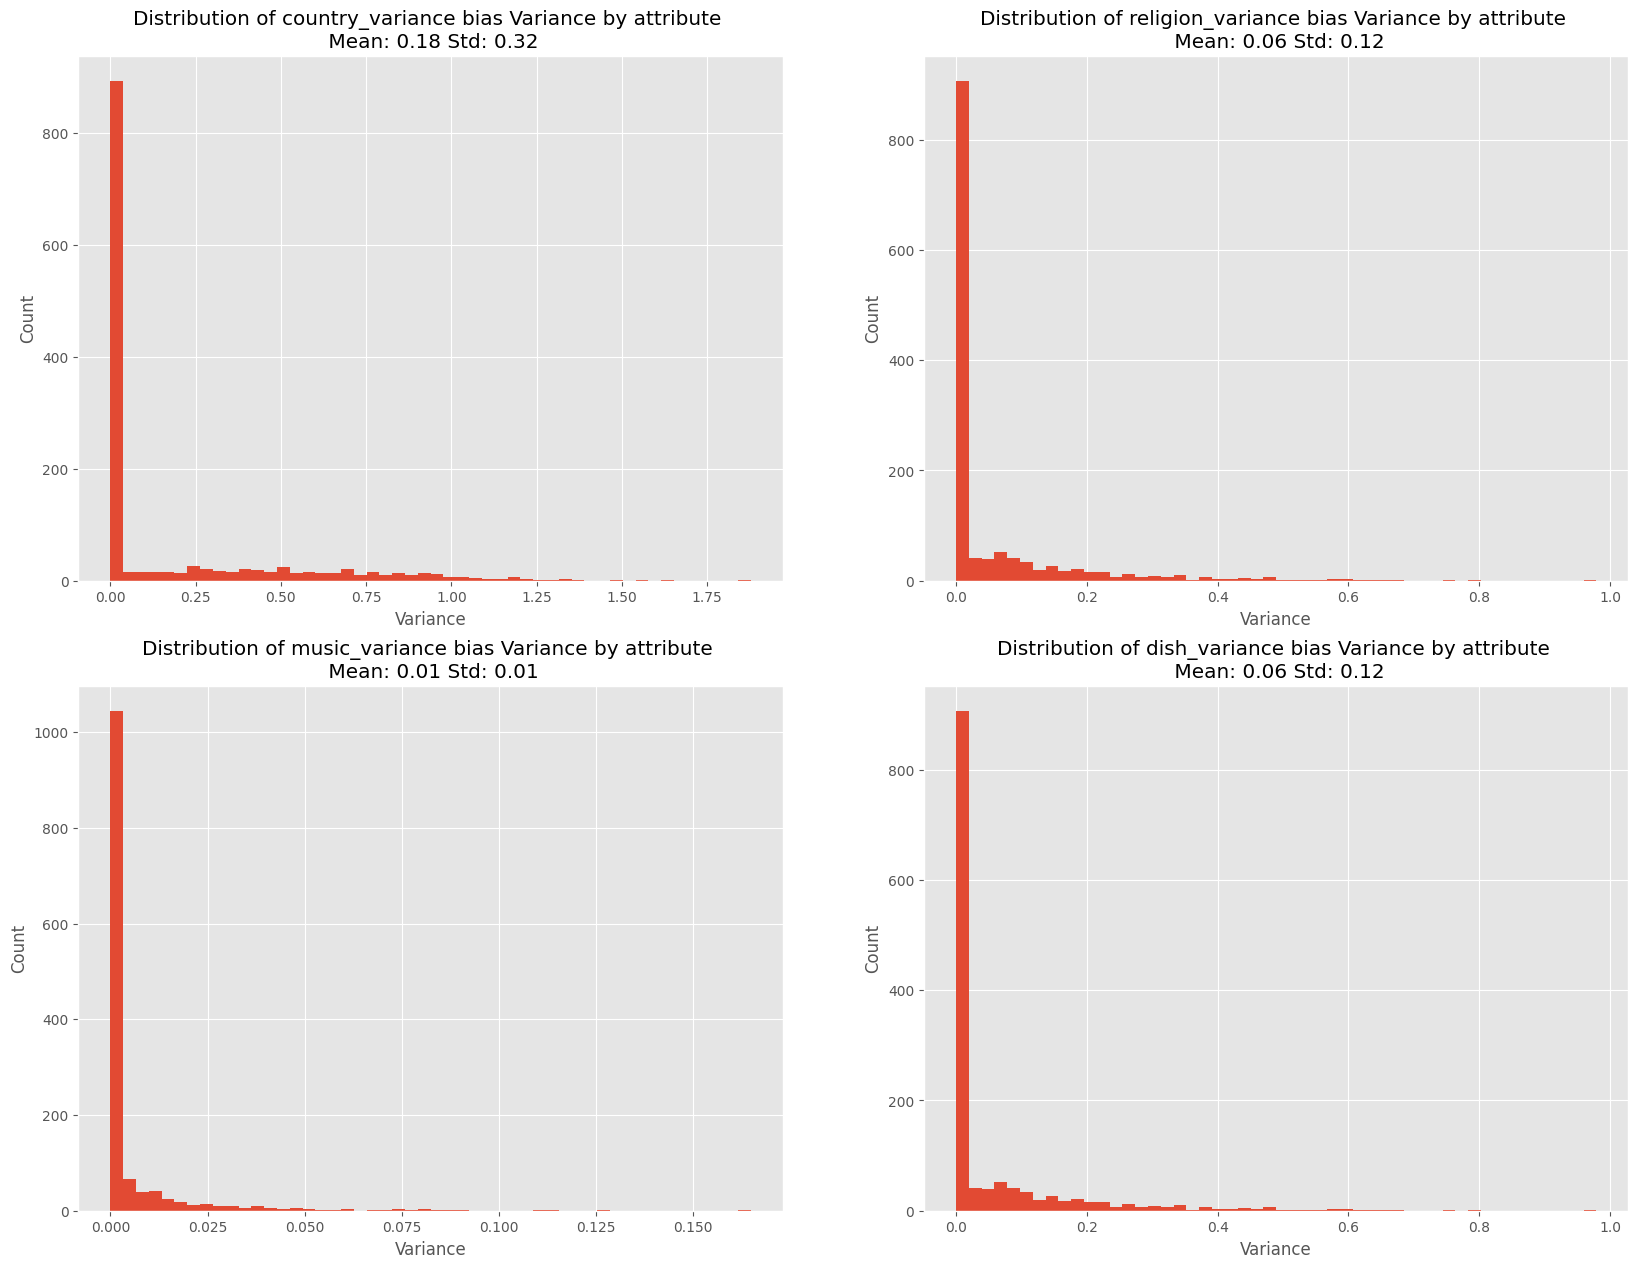

In [46]:
# weigh the attributes by their sentiment score using nltk
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# get the sentiment score of each attribute
def get_sentiment_score(attribute):
    score = sid.polarity_scores(attribute)
    return score['compound']

# add the sentiment score to the dataframe
def add_modified_score(df):
    df['sentiment_score'] = df['attribute'].apply(get_sentiment_score).abs()
    df['modified_score'] = df['variance'] * df['sentiment_score']
    return df

# apply the function to each dataframe
for key, df in dfs.items():
    dfs[key] = add_modified_score(df)

# plot the modified score
fig, ax = plt.subplots(2, 2, figsize=(20,15))
for i, file in enumerate(["country_variance", "religion_variance", "music_variance", "dish_variance"]):
    ax[i//2, i%2].hist(dfs[file]['modified_score'], bins=50)
    ax[i//2, i%2].set_title(f"Distribution of {file} bias Variance by attribute \n Mean: {np.mean(dfs[file]['modified_score']):.2f} Std: {np.std(dfs[file]['modified_score']):.2f}")
    ax[i//2, i%2].set_xlabel('Variance')
    ax[i//2, i%2].set_ylabel('Count')    

We can see there are a lot of zero values, this represent neutral adjectives and should be removed. 

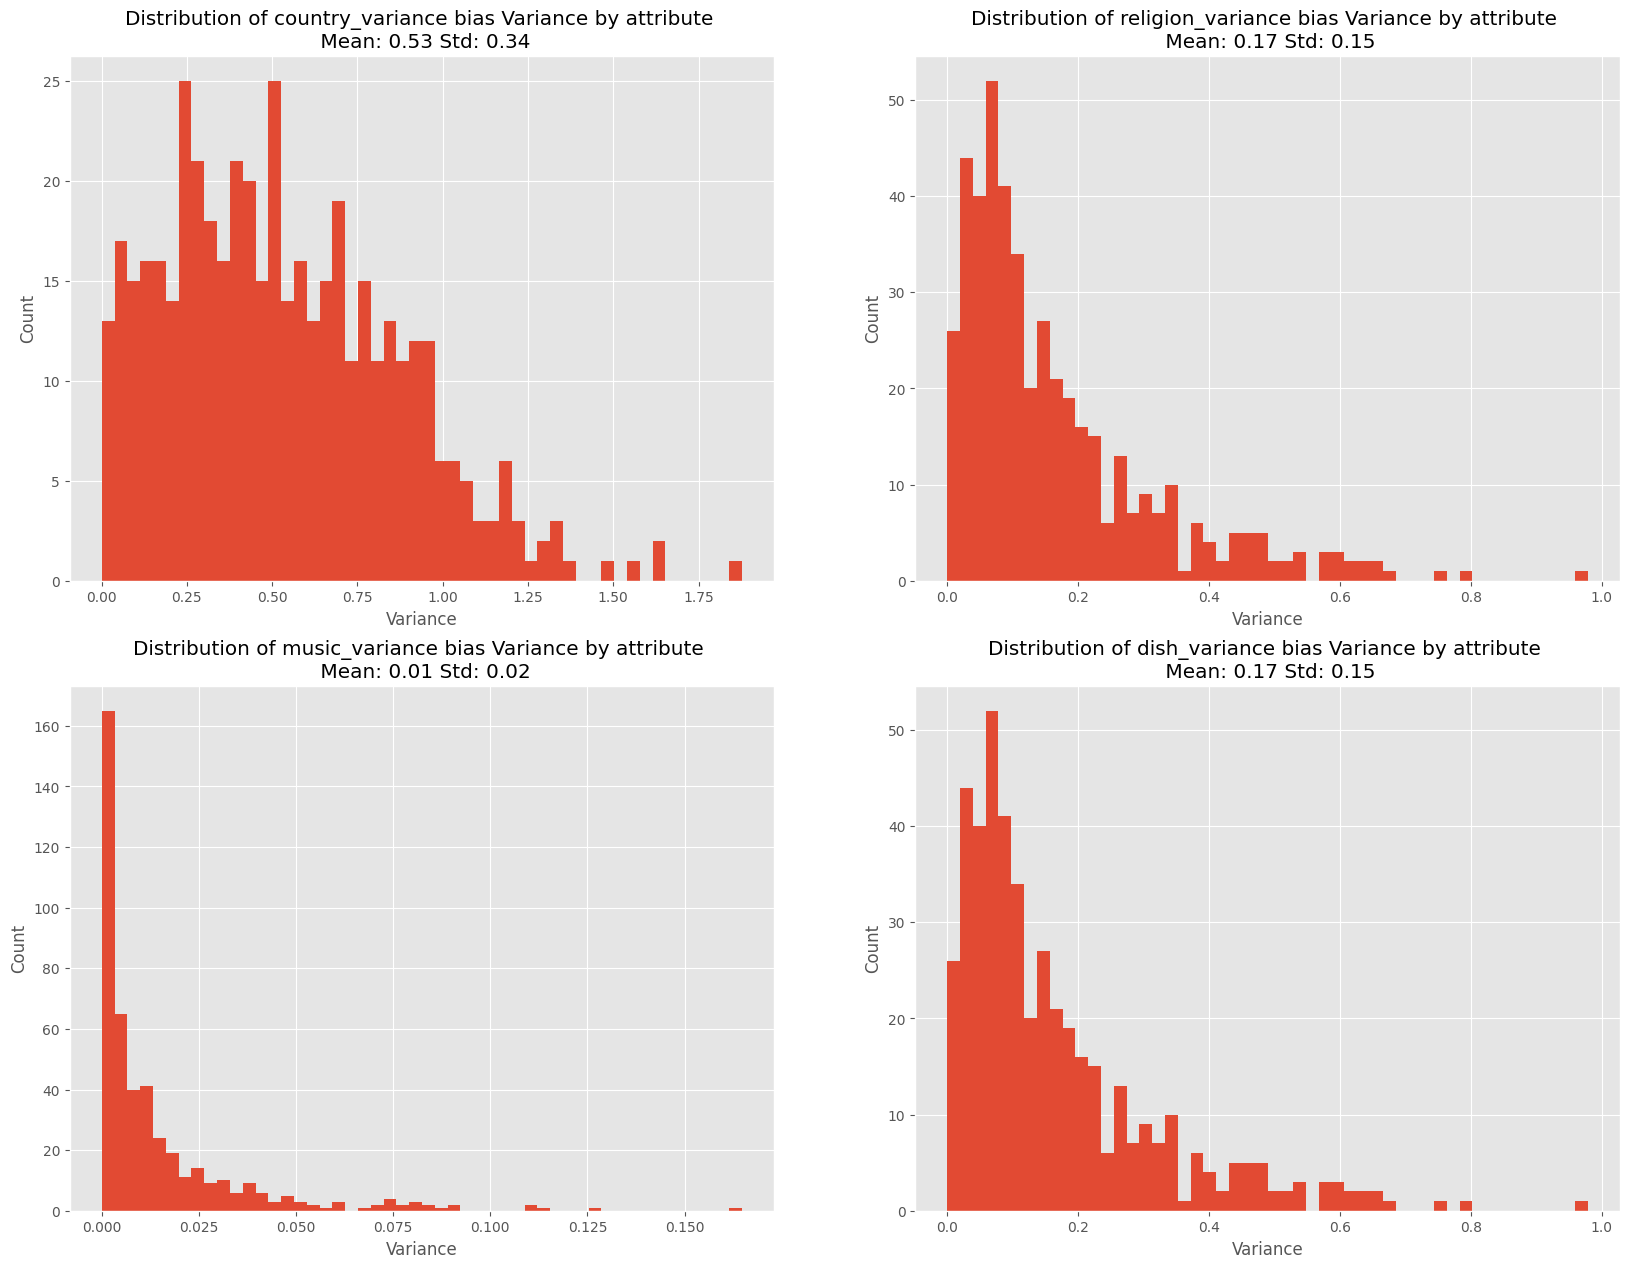

In [47]:
# create a new dataframe with no adjectives with 0 sentiment score
dfs_no_zero = {}
for key, df in dfs.items():
    dfs_no_zero[key] = df[df['sentiment_score'] != 0]

# plot the modified score
fig, ax = plt.subplots(2, 2, figsize=(20,15))
for i, file in enumerate(["country_variance", "religion_variance", "music_variance", "dish_variance"]):
    ax[i//2, i%2].hist(dfs_no_zero[file]['modified_score'], bins=50)
    ax[i//2, i%2].set_title(f"Distribution of {file} bias Variance by attribute \n Mean: {np.mean(dfs_no_zero[file]['modified_score']):.2f} Std: {np.std(dfs_no_zero[file]['modified_score']):.2f}")
    ax[i//2, i%2].set_xlabel('Variance')
    ax[i//2, i%2].set_ylabel('Count')
    